In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir = '/mnt/share/costeffectiveness/results/vivarium_ciff_sam/v7.1.0_full_model_vicious_cyle_diarrhea_remission/ciff_sam/2022_03_08_00_15_24/count_data/'

In [3]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [4]:
scenarios = ['sam_treatment','mam_treatment','sqlns',
                'lbwsg_interventions','zinc_supplementation']
scenario_names = ['SAM treatment',
                 'MAM treatment',
                 'SQ-LNS',
                 'LBWSG interventions',
                 'Zinc supplementation']
scenario_colors = [#'tab:blue',
                  'tab:orange',
                  'tab:green',
                  'tab:red',
                  'tab:purple',
                  'tab:brown']

ages = ['6-11_months','12_to_23_months','2_to_4']

In [5]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# wasting treatment

In [6]:
# start with wasting treatment

wasting_transition_count = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transition_count.head()

,sex,year,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [7]:
mam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                            'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count']))
              &(wasting_transition_count.mam_treatment=='covered')]
          .groupby(['input_draw','scenario','year']).sum()[['value']].reset_index())
mam_tx['intervention'] = 'mam_treatment'
mam_tx

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,3755.0,mam_treatment
1,29,baseline,2023,3787.0,mam_treatment
2,29,baseline,2024,3687.0,mam_treatment
3,29,baseline,2025,3885.0,mam_treatment
4,29,baseline,2026,3935.0,mam_treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,3223.0,mam_treatment
326,946,zinc_supplementation,2023,5485.0,mam_treatment
327,946,zinc_supplementation,2024,9449.0,mam_treatment
328,946,zinc_supplementation,2025,12435.0,mam_treatment


In [8]:
sam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count')
              &(wasting_transition_count.sam_treatment=='covered')]
          .groupby(['input_draw','scenario','year']).sum()[['value']].reset_index())
sam_tx['intervention'] = 'sam_treatment'
sam_tx

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,2690.0,sam_treatment
1,29,baseline,2023,2716.0,sam_treatment
2,29,baseline,2024,2740.0,sam_treatment
3,29,baseline,2025,2729.0,sam_treatment
4,29,baseline,2026,2579.0,sam_treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,2555.0,sam_treatment
326,946,zinc_supplementation,2023,2756.0,sam_treatment
327,946,zinc_supplementation,2024,2839.0,sam_treatment
328,946,zinc_supplementation,2025,2877.0,sam_treatment


# sqlns

In [9]:
pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [10]:
pt.age.unique()

array(['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months',
       '12_to_23_months', '2_to_4'], dtype=object)

In [11]:
sqlns = (pt.loc[(pt.age.isin(['6-11_months',
       '12_to_23_months', '2_to_4']))
               &(pt.sq_lns=='covered')]
         .groupby(['input_draw','scenario','year']).sum())[['value']].reset_index()
sqlns['intervention'] = 'sqlns'
sqlns

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.000000,sqlns
1,29,baseline,2023,0.000000,sqlns
2,29,baseline,2024,0.000000,sqlns
3,29,baseline,2025,0.000000,sqlns
4,29,baseline,2026,0.000000,sqlns
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.000000,sqlns
326,946,zinc_supplementation,2023,13898.798084,sqlns
327,946,zinc_supplementation,2024,42103.127995,sqlns
328,946,zinc_supplementation,2025,70607.221081,sqlns


# lbwsg

In [12]:
births = pd.read_csv(output_dir + 'births.csv')
births.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
0,0,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,bep,cat2
1,1,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,bep,cat2
2,2,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,mmn,cat2
3,3,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,mmn,cat2
4,4,female,2022,birth_weight_sum,29,baseline,4.489095e+06,covered,ifa,cat2


In [13]:
births.measure.unique()

array(['birth_weight_sum', 'low_weight_births', 'total_births'],
      dtype=object)

In [14]:
supplementation = (births.loc[(births.measure=='total_births')]
                   .groupby(['input_draw','scenario','year','maternal_supplementation']).sum()
                   [['value']]
                   .reset_index()
                   .rename(columns={'maternal_supplementation':'intervention'}))
supplementation = supplementation.loc[supplementation.intervention!='uncovered']
supplementation

,input_draw,scenario,year,intervention,value
0,29,baseline,2022,bep,0.0
1,29,baseline,2022,ifa,12956.0
2,29,baseline,2022,mmn,0.0
4,29,baseline,2023,bep,0.0
5,29,baseline,2023,ifa,12910.0
...,...,...,...,...,...
1313,946,zinc_supplementation,2025,ifa,0.0
1314,946,zinc_supplementation,2025,mmn,12546.0
1316,946,zinc_supplementation,2026,bep,4485.0
1317,946,zinc_supplementation,2026,ifa,0.0


In [15]:
itns = (births.loc[(births.measure=='total_births')
                              &(births.insecticide_treated_nets=='covered')]
                   .groupby(['input_draw','scenario','year']).sum()
                   [['value']]
                   .reset_index())
itns['intervention'] = 'itns'
itns

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,6075.0,itns
1,29,baseline,2023,6037.0,itns
2,29,baseline,2024,5938.0,itns
3,29,baseline,2025,6143.0,itns
4,29,baseline,2026,6188.0,itns
...,...,...,...,...,...
325,946,zinc_supplementation,2022,5663.0,itns
326,946,zinc_supplementation,2023,6577.0,itns
327,946,zinc_supplementation,2024,8754.0,itns
328,946,zinc_supplementation,2025,10628.0,itns


# zinc

In [16]:
# to do when we get the outputs

In [17]:
ther_zinc = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')
ther_zinc = ther_zinc.loc[ther_zinc.age.isin(ages)]
ther_zinc = ther_zinc.loc[(ther_zinc.therapeutic_zinc=='covered')
                         &(ther_zinc.measure=='susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count')]
ther_zinc = ther_zinc.groupby(['input_draw','scenario','year']).sum()[['value']].reset_index()
ther_zinc['intervention'] = 'therapeutic_zinc'
ther_zinc

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,32078.0,therapeutic_zinc
1,29,baseline,2023,32207.0,therapeutic_zinc
2,29,baseline,2024,32979.0,therapeutic_zinc
3,29,baseline,2025,33019.0,therapeutic_zinc
4,29,baseline,2026,32946.0,therapeutic_zinc
...,...,...,...,...,...
325,946,zinc_supplementation,2022,58009.0,therapeutic_zinc
326,946,zinc_supplementation,2023,68178.0,therapeutic_zinc
327,946,zinc_supplementation,2024,87211.0,therapeutic_zinc
328,946,zinc_supplementation,2025,105458.0,therapeutic_zinc


In [18]:
prev_zinc = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
prev_zinc = prev_zinc.loc[prev_zinc.age.isin(ages)]
prev_zinc = prev_zinc.loc[(prev_zinc.preventative_zinc=='covered')]
prev_zinc = prev_zinc.groupby(['input_draw','scenario','year']).sum()[['value']].reset_index()
prev_zinc['intervention'] = 'preventative_zinc'
prev_zinc

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.000000,preventative_zinc
1,29,baseline,2023,0.000000,preventative_zinc
2,29,baseline,2024,0.000000,preventative_zinc
3,29,baseline,2025,0.000000,preventative_zinc
4,29,baseline,2026,0.000000,preventative_zinc
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.000000,preventative_zinc
326,946,zinc_supplementation,2023,13829.184120,preventative_zinc
327,946,zinc_supplementation,2024,42210.305270,preventative_zinc
328,946,zinc_supplementation,2025,70719.190965,preventative_zinc


# all interventions


This dataframe gives us the total ANNUAL number of services provided for each intervention in each simulated scenario, by draw. This should be compared with simulation outcomes in count space to calculate ICERs (or converted to rate space to calculate costs per population size). 

Note:

- SQ-LNS and prevenative zinc are measures of person-time rather than counts... it is equivalent to the count of yearly provisions
- For maternal supplementation and insecticide treated nets, we consider coverage only among live births. However, this will be an underestimate of total population coverage of these interventions given that some mothers covered by the interventions will result in stillbirths. We should consider either: a) noting this in our limitations, or b) incorporating this into our cost model using the stillbirth to live birth ratio covariate
    - Also, we do not consider the delay in coverage to account for gestation

In [19]:
data = pd.concat([sam_tx,
                 mam_tx,
                 sqlns,
                 supplementation,
                 itns,
                 prev_zinc,
                 ther_zinc])
data

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,2690.0,sam_treatment
1,29,baseline,2023,2716.0,sam_treatment
2,29,baseline,2024,2740.0,sam_treatment
3,29,baseline,2025,2729.0,sam_treatment
4,29,baseline,2026,2579.0,sam_treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,58009.0,therapeutic_zinc
326,946,zinc_supplementation,2023,68178.0,therapeutic_zinc
327,946,zinc_supplementation,2024,87211.0,therapeutic_zinc
328,946,zinc_supplementation,2025,105458.0,therapeutic_zinc


# import costs

In [20]:
costs = pd.read_csv('ciff_costs.csv').rename(columns={'intervention_name':'intervention'})
costs.head()

,intervention,cost_per_service
0,sam_treatment,49.68
1,mam_treatment,12.55
2,sqlns,23.25
3,ifa,0.91
4,mms,2.98


In [21]:
sim_costs = data.merge(costs, on=['intervention'])
sim_costs['total_cost'] = sim_costs['value'] * sim_costs.cost_per_service
(sim_costs.groupby(['input_draw','scenario','intervention','year']).sum()).groupby(['intervention','scenario']).mean()/1_000_000

value  cost_per_service  total_cost
intervention      scenario                                                    
bep               baseline              0.000000      3.224000e-05    0.000000
                  lbwsg_interventions   0.002204      3.224000e-05    0.071051
                  mam_treatment         0.000000      3.224000e-05    0.000000
                  sam_treatment         0.000000      3.224000e-05    0.000000
                  sqlns                 0.000000      3.224000e-05    0.000000
                  zinc_supplementation  0.002204      3.224000e-05    0.071051
ifa               baseline              0.012970      9.100000e-07    0.011802
                  lbwsg_interventions   0.005172      9.100000e-07    0.004707
                  mam_treatment         0.012970      9.100000e-07    0.011802
                  sam_treatment         0.012970      9.100000e-07    0.011802
                  sqlns                 0.012970      9.100000e-07    0.011802
                  zinc_supplementation  0.005172      9.100000e-07    0.004707
itns              baseline              0.005783      4.450000e-06    0.025735
                  lbwsg_interventions   0.008785      4.450000e-06    0.039095
                  mam_treatment         0.005783      4.450000e-06    0.025735
                  sam_treatment         0.005783      4.450000e-06    0.025735
                  sqlns                 0.005783      4.450000e-06    0.025735
                  zinc_supplementation  0.008785      4.450000e-06    0.039095
mam_treatment     baseline              0.003434      1.255000e-05    0.043095
                  lbwsg_interventions   0.009255      1.255000e-05    0.116152
                  mam_treatment         0.010267      1.255000e-05    0.128852
                  sam_treatment         0.003380      1.255000e-05    0.042422
                  sqlns                 0.009255      1.255000e-05    0.116154
                  zinc_supplementation  0.008762      1.255000e-05    0.109965
preventative_zinc baseline              0.000000      2.610000e-06    0.000000
                  lbwsg_interventions   0.000000      2.610000e-06    0.000000
                  mam_treatment         0.000000      2.610000e-06    0.000000
                  sam_treatment         0.000000      2.610000e-06    0.000000
                  sqlns                 0.000000      2.610000e-06    0.000000
                  zinc_supplementation  0.042206      2.610000e-06    0.110158
sam_treatment     baseline              0.002399      4.968000e-05    0.119172
                  lbwsg_interventions   0.002613      4.968000e-05    0.129803
                  mam_treatment         0.002785      4.968000e-05    0.138382
                  sam_treatment         0.002972      4.968000e-05    0.147628
                  sqlns                 0.002616      4.968000e-05    0.129965
                  zinc_supplementation  0.002529      4.968000e-05    0.125650
sqlns             baseline              0.000000      2.325000e-05    0.000000
                  lbwsg_interventions   0.042208      2.325000e-05    0.981329
                  mam_treatment         0.000000      2.325000e-05    0.000000
                  sam_treatment         0.000000      2.325000e-05    0.000000
                  sqlns                 0.042196      2.325000e-05    0.981053
                  zinc_supplementation  0.042220      2.325000e-05    0.981609
therapeutic_zinc  baseline              0.076695      1.900000e-07    0.014572
                  lbwsg_interventions   0.075813      1.900000e-07    0.014405
                  mam_treatment         0.076699      1.900000e-07    0.014573
                  sam_treatment         0.076697      1.900000e-07    0.014572
                  sqlns                 0.075833      1.900000e-07    0.014408
                  zinc_supplementation  0.100504      1.900000e-07    0.019096

In [22]:
sim_costs = data.merge(costs, on=['intervention'])
sim_costs['total_cost'] = sim_costs['value'] * sim_costs.cost_per_service
sim_costs = sim_costs.groupby(['input_draw','scenario','year']).sum()[['total_cost']].rename(columns={'total_cost':'value'})
sim_costs

value
input_draw scenario             year              
29         baseline             2022  2.256830e+05
                                2023  2.271898e+05
                                2024  2.268624e+05
                                2025  2.298135e+05
                                2026  2.230197e+05
...                                            ...
946        zinc_supplementation 2022  2.151274e+05
                                2023  6.404232e+05
                                2024  1.479695e+06
                                2025  2.314866e+06
                                2026  2.723735e+06

[330 rows x 1 columns]

In [23]:
pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
pt = pt.groupby(['input_draw','scenario','year']).sum()[['value']]
pt.head()

value
input_draw scenario year               
29         baseline 2022  101689.514031
                    2023  102987.282683
                    2024  104374.269678
                    2025  104730.239562
                    2026  104550.261465

In [24]:
sim_cost_rate = sim_costs / pt * 100_000
sim_cost_rate 

value
input_draw scenario             year              
29         baseline             2022  2.219334e+05
                                2023  2.205999e+05
                                2024  2.173547e+05
                                2025  2.194337e+05
                                2026  2.133134e+05
...                                            ...
946        zinc_supplementation 2022  2.110800e+05
                                2023  6.205037e+05
                                2024  1.416957e+06
                                2025  2.210705e+06
                                2026  2.596852e+06

[330 rows x 1 columns]

In [25]:
sim_cost_rate.groupby(['scenario','year']).describe(percentiles=[0.025,0.975])/1_000_000
# costs in millions for each scenario

value                                          \
                              count      mean       std       min      2.5%   
scenario             year                                                     
baseline             2022  0.000011  0.207851  0.023933  0.157663  0.164549   
                     2023  0.000011  0.207849  0.023715  0.159414  0.164787   
                     2024  0.000011  0.206417  0.024851  0.157115  0.162926   
                     2025  0.000011  0.207717  0.024408  0.156677  0.163412   
                     2026  0.000011  0.205566  0.025080  0.151950  0.159423   
lbwsg_interventions  2022  0.000011  0.207851  0.023933  0.157663  0.164549   
                     2023  0.000011  0.577600  0.021217  0.536138  0.540969   
                     2024  0.000011  1.305987  0.019261  1.275732  1.277361   
                     2025  0.000011  2.029386  0.016270  2.001464  2.004422   
                     2026  0.000011  2.384193  0.015709  2.364129  2.364324   
mam_treatment        2022  0.000011  0.207851  0.023933  0.157663  0.164549   
                     2023  0.000011  0.243146  0.021007  0.204467  0.207584   
                     2024  0.000011  0.309934  0.021080  0.282024  0.283100   
                     2025  0.000011  0.375141  0.015661  0.352568  0.352883   
                     2026  0.000011  0.402151  0.016031  0.377386  0.379568   
sam_treatment        2022  0.000011  0.207851  0.023933  0.157663  0.164549   
                     2023  0.000011  0.216947  0.021564  0.175528  0.179422   
                     2024  0.000011  0.233449  0.020745  0.201856  0.204500   
                     2025  0.000011  0.251874  0.016770  0.229725  0.230001   
                     2026  0.000011  0.258273  0.017147  0.238237  0.238531   
sqlns                2022  0.000011  0.207851  0.023933  0.157663  0.164549   
                     2023  0.000011  0.553216  0.021478  0.511303  0.516068   
                     2024  0.000011  1.233935  0.020174  1.204057  1.205339   
                     2025  0.000011  1.906622  0.015343  1.878771  1.882305   
                     2026  0.000011  2.234641  0.016337  2.214153  2.215460   
zinc_supplementation 2022  0.000011  0.207851  0.023933  0.157663  0.164549   
                     2023  0.000011  0.612637  0.021156  0.571437  0.576071   
                     2024  0.000011  1.408553  0.018782  1.379011  1.380795   
                     2025  0.000011  2.195876  0.015494  2.171246  2.171873   
                     2026  0.000011  2.580245  0.014701  2.553529  2.555749   

                                                         
                                50%     97.5%       max  
scenario             year                                
baseline             2022  0.211080  0.238949  0.241488  
                     2023  0.212294  0.234313  0.234878  
                     2024  0.210915  0.239574  0.241237  
                     2025  0.212039  0.235208  0.235213  
                     2026  0.210824  0.237709  0.240160  
lbwsg_interventions  2022  0.211080  0.238949  0.241488  
                     2023  0.586463  0.601322  0.602928  
                     2024  1.312847  1.334893  1.338731  
                     2025  2.033099  2.052588  2.055600  
                     2026  2.386131  2.410234  2.413464  
mam_treatment        2022  0.211080  0.238949  0.241488  
                     2023  0.248686  0.268444  0.270198  
                     2024  0.316033  0.343686  0.348941  
                     2025  0.380514  0.396407  0.399767  
                     2026  0.403152  0.428517  0.432339  
sam_treatment        2022  0.211080  0.238949  0.241488  
                     2023  0.221426  0.242534  0.243808  
                     2024  0.239369  0.267205  0.271269  
                     2025  0.257159  0.277245  0.280466  
                     2026  0.260174  0.289529  0.295916  
sqlns                2022  0.211080  0.238949  0.241488  
                     2023  0.5

In [26]:
incremental_cost = (sim_cost_rate - 
                     (sim_cost_rate.reset_index().loc[sim_cost_rate.reset_index().scenario=='baseline'])
                     .set_index(['input_draw','year'])[['value']])
incremental_cost # per 100,000 py

value
input_draw year scenario                          
29         2022 baseline              0.000000e+00
                lbwsg_interventions   0.000000e+00
                mam_treatment         0.000000e+00
                sam_treatment         0.000000e+00
                sqlns                 0.000000e+00
...                                            ...
946        2026 lbwsg_interventions   2.194442e+06
                mam_treatment         2.109503e+05
                sam_treatment         6.426570e+04
                sqlns                 2.041613e+06
                zinc_supplementation  2.390751e+06

[330 rows x 1 columns]

In [27]:
cols = ['input_draw','scenario','year','age']

ylds = pd.read_csv(output_dir + 'ylds.csv').groupby(cols).sum()[['value']]
ylls = pd.read_csv(output_dir + 'ylls.csv').groupby(cols).sum()[['value']]
dalys = (ylds + ylls).reset_index()

dalys_lbwsg = dalys.loc[(dalys.age.isin(['early_neonatal','late_neonatal','1-5_months']))
                         &(dalys.scenario=='lbwsg_interventions')]
dalys_lbwsg['scenario'] = 'zinc_supplementation'
dalys_zinc = dalys.loc[(dalys.scenario=='zinc_supplementation')&(dalys.age.isin(['6-11_months',
                                                                            '12_to_23_months',
                                                                            '2_to_4']))]
dalys_zinc = pd.concat([dalys_zinc,dalys_lbwsg])
dalys = pd.concat([dalys.loc[dalys.scenario!='zinc_supplementation'],
                 dalys_zinc]).groupby(['input_draw','scenario','year']).sum()

dalys = dalys / pt * 100_000
dalys_baseline = dalys.reset_index().loc[dalys.reset_index().scenario=='baseline'].set_index(['input_draw','year'])[['value']]
dalys_averted = dalys_baseline - dalys
dalys_averted.head()

<ipython-input-27-1fd4f10c18f1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dalys_lbwsg['scenario'] = 'zinc_supplementation'


value
input_draw year scenario                  
29         2022 baseline               0.0
                lbwsg_interventions    0.0
                mam_treatment          0.0
                sam_treatment          0.0
                sqlns                  0.0

In [28]:
cols = ['input_draw','year','scenario']

wt = pd.read_csv(output_dir + 'wasting_transition_count.csv')#.groupby(cols).sum()[['value']]
sam_cases = (wt.loc[wt.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count']
             .groupby(cols).sum()[['value']])
sam_cases = sam_cases / pt * 100_000
sam_cases_baseline = sam_cases.reset_index().loc[sam_cases.reset_index().scenario=='baseline'].set_index(['input_draw','year']).drop(columns='scenario')
sam_cases_averted = (sam_cases_baseline - sam_cases)
sam_cases_pct_reduction = (sam_cases_baseline - sam_cases)/sam_cases_baseline*100
sam_cases_averted

value
input_draw year scenario                         
29         2022 baseline                 0.000000
                lbwsg_interventions      0.000000
                mam_treatment            0.000000
                sam_treatment            0.000000
                sqlns                    0.000000
...                                           ...
946        2026 lbwsg_interventions   1452.696808
                mam_treatment          884.215208
                sam_treatment          206.306217
                sqlns                 1427.821849
                zinc_supplementation  1748.252732

[330 rows x 1 columns]

In [29]:
cols = ['input_draw','scenario','year']

wpt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')#.groupby(cols).sum()[['value']]
wpt = wpt.loc[wpt.age.isin(['6-11_months','12_to_23_months','2_to_4'])]
sam_prev = ((wpt.loc[wpt.cause=='severe_acute_malnutrition']
             .groupby(cols).sum()[['value']])
            / wpt.groupby(cols).sum()[['value']]) * 100
sam_prev_baseline = sam_prev.reset_index().loc[sam_prev.reset_index().scenario=='baseline'].set_index(['input_draw','year']).drop(columns='scenario')
sam_prev_averted = (sam_prev_baseline - sam_prev)
sam_prev_pct_reduction = (sam_prev_baseline - sam_prev)/sam_prev_baseline*100
sam_prev_pct_reduction

value
input_draw year scenario                       
29         2022 baseline               0.000000
                lbwsg_interventions    0.000000
                mam_treatment          0.000000
                sam_treatment          0.000000
                sqlns                  0.000000
...                                         ...
946        2026 lbwsg_interventions   34.659684
                mam_treatment         25.944719
                sam_treatment         16.973124
                sqlns                 33.919889
                zinc_supplementation  38.371825

[330 rows x 1 columns]

In [30]:
def calculate_sam_cases_averted(sam_cases_averted_scenario, relative_scenario):
    sam_cases_rel = (sam_cases.reset_index().loc[sam_cases.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw','year'])[['value']])
    sam_cases_averted_rel = (sam_cases_rel - sam_cases).reset_index()
    sam_cases_averted_rel = sam_cases_averted_rel.loc[sam_cases_averted_rel.scenario==sam_cases_averted_scenario]
    return sam_cases_averted_rel

def calculate_cascading_sam_cases_averted():
    data = calculate_sam_cases_averted('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_sam_cases_averted(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [31]:
def calculate_incremental_cost(incremental_cost_scenario, relative_scenario):
    sim_cost_rel = (sim_cost_rate.reset_index().loc[sim_cost_rate.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw','year'])[['value']])
    incremental_cost = (sim_cost_rate - sim_cost_rel).reset_index()
    incremental_cost = incremental_cost.loc[incremental_cost.scenario==incremental_cost_scenario]
    return incremental_cost

def calculate_cascading_incremental_costs():
    data = calculate_incremental_cost('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_incremental_cost(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [32]:
def calculate_dalys_averted(dalys_averted_scenario, relative_scenario):
    dalys_rel = (dalys.reset_index().loc[dalys.reset_index().scenario==relative_scenario]
                         .set_index(['input_draw','year'])[['value']])
    dalys_averted_rel = (dalys_rel - dalys).reset_index()
    dalys_averted_rel = dalys_averted_rel.loc[dalys_averted_rel.scenario==dalys_averted_scenario]
    return dalys_averted_rel

def calculate_cascading_dalys_averted():
    data = calculate_dalys_averted('sam_treatment', 'baseline')
    data['relative_scenario'] = 'baseline'
    for i in [0,1,2,3]:
        temp = calculate_dalys_averted(scenarios[scenarios.index(scenarios[i])+1],
                                         scenarios[i])
        temp['relative_scenario'] = scenarios[i]
        data = pd.concat([data,temp])
    return data

In [33]:
cascading_incremental_costs = calculate_cascading_incremental_costs()
cascading_incremental_costs.head()

,input_draw,year,scenario,value,relative_scenario
3,29,2022,sam_treatment,0.000000,baseline
9,29,2023,sam_treatment,7123.947485,baseline
15,29,2024,sam_treatment,22014.512626,baseline
21,29,2025,sam_treatment,40694.716117,baseline
27,29,2026,sam_treatment,45038.201862,baseline


In [34]:
cascading_dalys_averted = calculate_cascading_dalys_averted()
cascading_dalys_averted.head()

,input_draw,year,scenario,value,relative_scenario
3,29,2022,sam_treatment,0.000000,baseline
9,29,2023,sam_treatment,89.395088,baseline
15,29,2024,sam_treatment,98.464715,baseline
21,29,2025,sam_treatment,274.729913,baseline
27,29,2026,sam_treatment,541.827118,baseline


In [35]:
cascading_sam_cases_averted = calculate_cascading_sam_cases_averted()
cascading_sam_cases_averted.head()

,input_draw,year,scenario,value,relative_scenario
3,29,2022,sam_treatment,0.000000,baseline
9,29,2023,sam_treatment,15.563402,baseline
15,29,2024,sam_treatment,58.514464,baseline
21,29,2025,sam_treatment,111.834457,baseline
27,29,2026,sam_treatment,131.316569,baseline


In [36]:
cascading_icers = (cascading_incremental_costs.set_index(['input_draw','scenario','relative_scenario','year'])
                   /cascading_dalys_averted.set_index(['input_draw','scenario','relative_scenario','year']))
cascading_icers.head()                   

value
input_draw scenario      relative_scenario year            
29         sam_treatment baseline          2022         NaN
                                           2023   79.690592
                                           2024  223.577680
                                           2025  148.126266
                                           2026   83.122827

In [37]:
cascading_icers_sam_cases = (cascading_incremental_costs.set_index(['input_draw','scenario','relative_scenario','year'])
                   /cascading_sam_cases_averted.set_index(['input_draw','scenario','relative_scenario','year']))
cascading_icers_sam_cases.head()                   

value
input_draw scenario      relative_scenario year            
29         sam_treatment baseline          2022         NaN
                                           2023  457.737177
                                           2024  376.223438
                                           2025  363.883522
                                           2026  342.974250

# ICERs

In [38]:
icers = (incremental_cost / dalys_averted).reset_index()
icers.head()

,input_draw,year,scenario,value
0,29,2022,baseline,NaN
1,29,2022,lbwsg_interventions,NaN
2,29,2022,mam_treatment,NaN
3,29,2022,sam_treatment,NaN
4,29,2022,sqlns,NaN


In [39]:
icers_sam = (incremental_cost / sam_cases_averted).reset_index()
icers_sam.head()

,input_draw,year,scenario,value
0,29,2022,baseline,NaN
1,29,2022,lbwsg_interventions,NaN
2,29,2022,mam_treatment,NaN
3,29,2022,sam_treatment,NaN
4,29,2022,sqlns,NaN


In [75]:
def plot_measure_averted_and_incremental_costs(measure_data, measure_label, measure_title):
    plt.figure(dpi=200)
    plot = (measure_data.rename(columns={'value':'measure_averted'})
               .merge(incremental_cost.rename(columns={'value':'incremental_cost'}), 
                      right_index=True, left_index=True)).reset_index()
    plot = plot.loc[plot.year==2026]
    for i in list(range(0,len(scenarios))):
        p = plot.loc[plot.scenario==scenarios[i]]
        plt.scatter(p.measure_averted, p.incremental_cost/1_000_000, s=7, label=scenario_names[i],
                   color=scenario_colors[i])
        plt.grid()
    #plt.legend(bbox_to_anchor=[1,1])
    plt.xlabel(f'{measure_label} per 100,000 PY')
    plt.ylabel('Incremental cost relative to baseline\nin millions of USD per 100,000 PY')
    plt.xlim(-200,10200)# - 0.05*plot['measure_averted'].max(),
             #plot['measure_averted'].max()*1.15)
    plt.title(f'{measure_title} and incremental\ncosts relative to baseline per 100,000 person-years\nat target coverage in 2026')

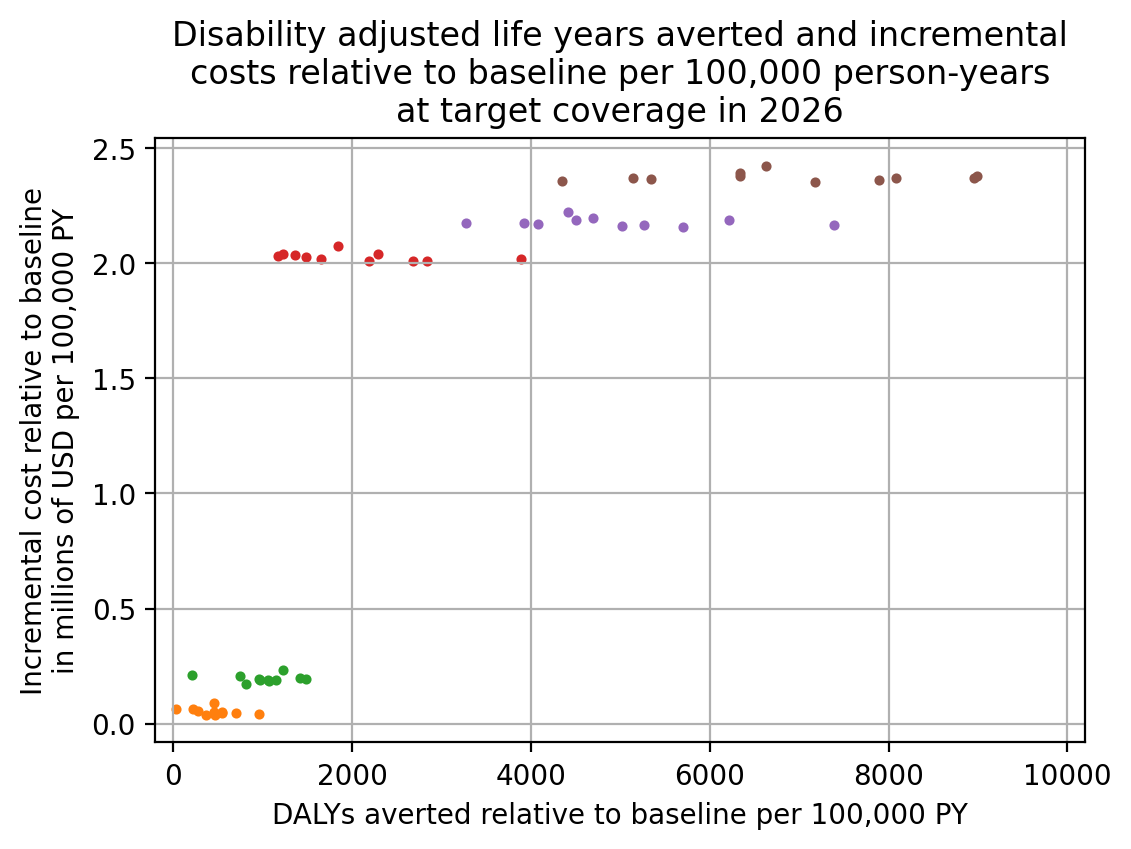

In [76]:
plot_measure_averted_and_incremental_costs(dalys_averted, 'DALYs averted relative to baseline', 'Disability adjusted life years averted')
#plot_measure_averted_and_incremental_costs(sam_cases_averted, 'SAM cases averted relative to baseline', 'SAM cases averted')
#plot_measure_averted_and_incremental_costs(sam_prev_pct_reduction, 'Percent reduction in baseline SAM prevalence', 
#                                           'Percent reduction in baseline SAM prevalence')
#plot_measure_averted_and_incremental_costs(sam_cases_pct_reduction, 'Percent reduction in baseline incident SAM cases', 
#                                           'Percent reduction in baseline incident SAM cases')

In [98]:
def plot_icers(dataframe, label, title, ylim):
    plt.figure(dpi=120)
    p = dataframe.groupby(['scenario','year']).describe(percentiles=[0.1,0.9])[['value']].reset_index()
    p = p.loc[p.year==2026]
    p['order'] = np.where(p.scenario=='sam_treatment',0,
                         np.where(p.scenario=='mam_treatment',1,
                                 np.where(p.scenario=='sqlns',2,
                                         np.where(p.scenario=='lbwsg_interventions',3,
                                                 np.where(p.scenario=='zinc_supplementation',4,np.nan)))))
    p = p.sort_values(by='order')
    plt.bar(p.scenario, p['value','50%'], yerr=[p['value','50%']-p['value','10%'],
                                                 p['value','90%']-p['value','50%']])
    #plt.ylim(0,ylim)
    plt.xticks(scenarios, [s + '\nscenario' for s in scenario_names],rotation=60)
    plt.grid()
    plt.ylabel(label)
    plt.title(title)
    plt.semilogy()
    plt.yticks([50,100,250,2000,5000],
               ['50','100','250','2,000','5,000'])

In [99]:
p = cascading_icers.reset_index()
p = p.loc[p.year==2026].groupby(['scenario','relative_scenario']).describe(percentiles=[0.025,0.975])
p[['value']]

value                            \
                                         count         mean          std   
scenario             relative_scenario                                     
lbwsg_interventions  sqlns                11.0    53.853716    11.878135   
mam_treatment        sam_treatment        11.0   309.643091   179.581688   
sam_treatment        baseline             11.0   308.368510   611.989013   
sqlns                mam_treatment        11.0  2761.731858  2401.349568   
zinc_supplementation lbwsg_interventions  11.0   116.863497    41.064612   

                                                                               \
                                                 min        2.5%          50%   
scenario             relative_scenario                                          
lbwsg_interventions  sqlns                 37.904611   39.070679    52.106830   
mam_treatment        sam_treatment        169.708994  175.035980   268.621211   
sam_treatment        baseline              43.394265   48.657996   104.148146   
sqlns                mam_treatment        758.214689  795.642914  2093.705135   
zinc_supplementation lbwsg_interventions   67.203912   67.696031   119.306118   

                                                                    
                                                97.5%          max  
scenario             relative_scenario                              
lbwsg_interventions  sqlns                  76.361274    80.294847  
mam_treatment        sam_treatment         713.343647   812.499382  
sam_treatment        baseline             1676.601134  2141.083552  
sqlns                mam_treatment        7941.923300  9413.823996  
zinc_supplementation lbwsg_interventions   186.670283   191.216068

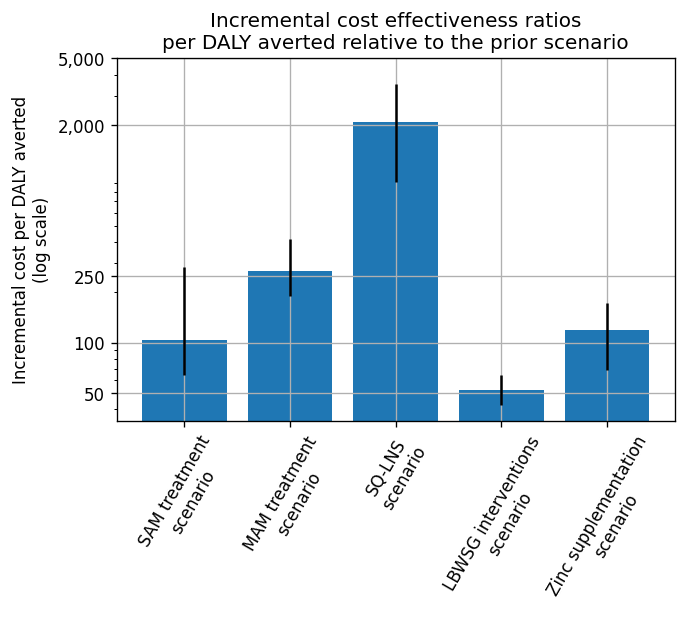

In [101]:
plot_icers(cascading_icers, 'Incremental cost per DALY averted\n(log scale)',
           'Incremental cost effectiveness ratios\nper DALY averted relative to the prior scenario',4500)


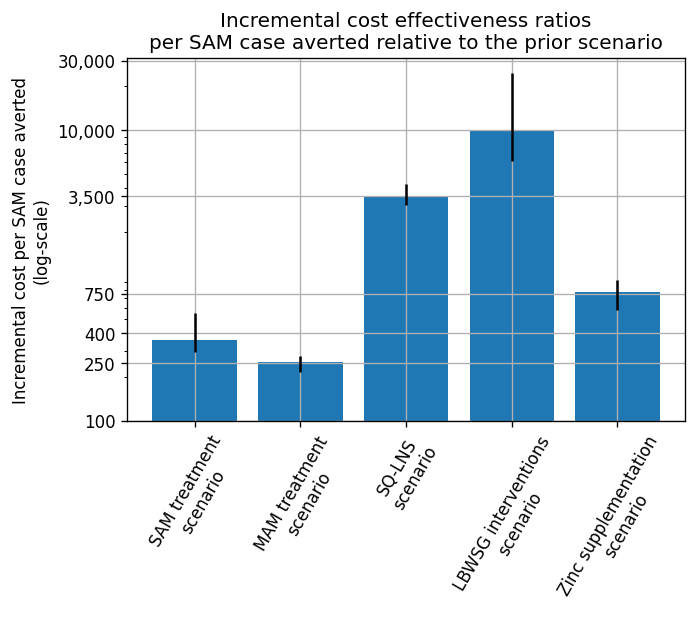

In [85]:
plot_icers(cascading_icers_sam_cases, 'Incremental cost per SAM case averted\n(log-scale)',
           'Incremental cost effectiveness ratios\nper SAM case averted relative to the prior scenario',23000)

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


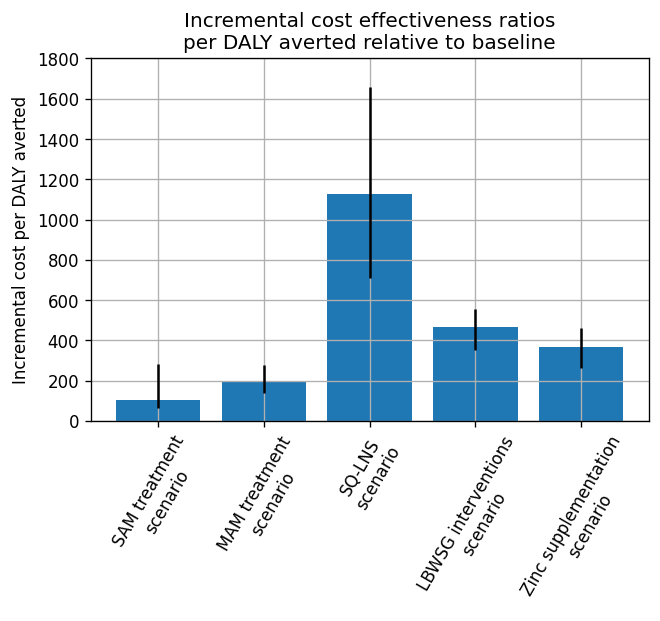

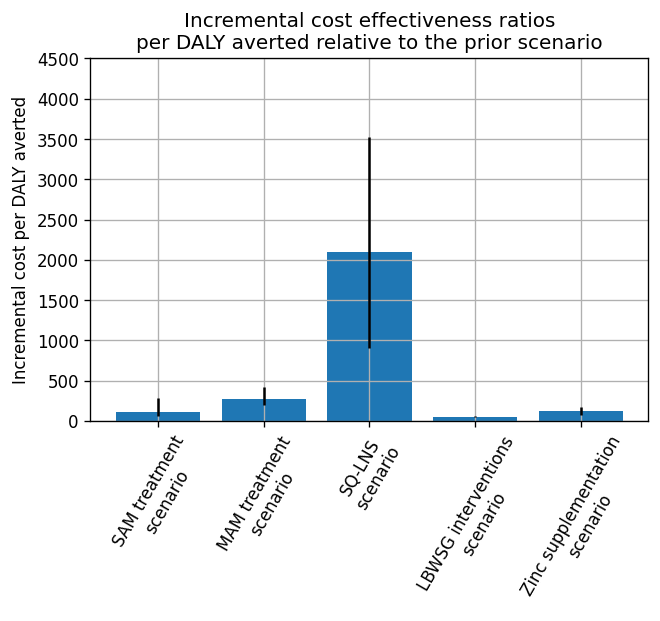

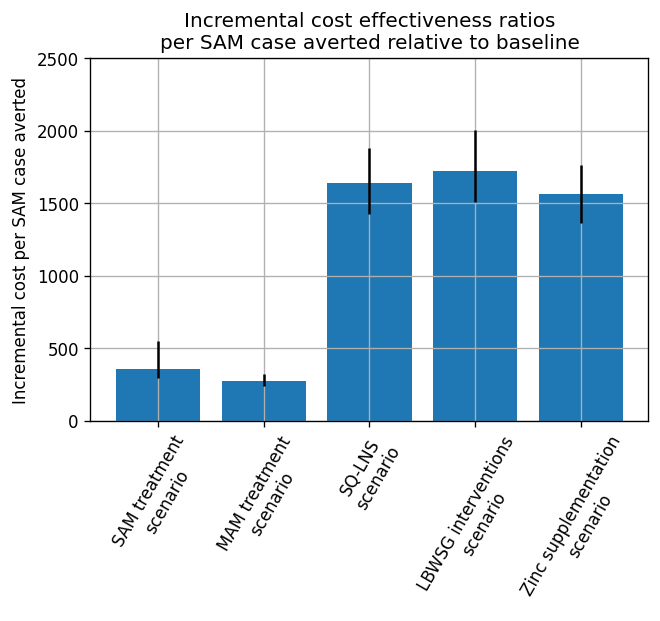

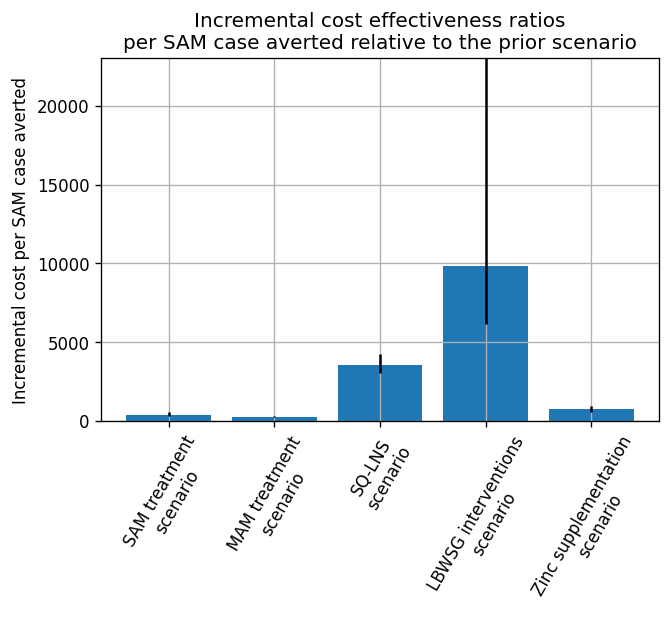

In [82]:
plot_icers(icers, 'Incremental cost per DALY averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to baseline',1800)
plot_icers(cascading_icers, 'Incremental cost per DALY averted',
           'Incremental cost effectiveness ratios\nper DALY averted relative to the prior scenario',4500)
plot_icers(icers_sam, 'Incremental cost per SAM case averted',
           'Incremental cost effectiveness ratios\nper SAM case averted relative to baseline', 2500)
plot_icers(cascading_icers_sam_cases, 'Incremental cost per SAM case averted',
           'Incremental cost effectiveness ratios\nper SAM case averted relative to the prior scenario',23000)